# Ejercicio Formativo 2 Capítulo 3

In [73]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import pandas as pd
df = pd.read_csv('E2_datos.csv')
df.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,2008,1,1,29.63,NaN,NaN
1,2008,1,2,21.46,NaN,NaN
2,2008,1,3,24.25,NaN,NaN
3,2008,1,4,29.04,NaN,NaN
4,2008,1,5,30.17,NaN,NaN


In [75]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

## Codificar columnas categóricas

In [76]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Year', 'Month', 'Day', 'Environmental_risk']
label_encoder = LabelEncoder()

In [77]:
print("Valores únicos antes de la codificación:")
for columna in categorical_columns:
    print(columna, df[columna].unique())

Valores únicos antes de la codificación:
Year [2008 2009 2010 2011 2012 2013 2014 2015 2016]
Month [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Environmental_risk [nan 'medio' 'Bajo' 'extremo' 'Alto' 'nulo']


In [78]:
for columna in categorical_columns:
    df[columna] = label_encoder.fit_transform(df[columna])

In [79]:
print("\nValores únicos después de la codificación:")
for columna in categorical_columns:
    print(columna, df[columna].unique())


Valores únicos después de la codificación:
Year [0 1 2 3 4 5 6 7 8]
Month [ 0  1  2  3  4  5  6  7  8  9 10 11]
Day [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Environmental_risk [5 3 1 2 0 4]


In [80]:
df['Environmental_risk'] = df['Environmental_risk'].replace(to_replace=5, value=np.nan)

In [81]:
df.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,0,0,0,29.63,NaN,NaN
1,0,0,1,21.46,NaN,NaN
2,0,0,2,24.25,NaN,NaN
3,0,0,3,29.04,NaN,NaN
4,0,0,4,30.17,NaN,NaN


In [82]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

## Misión 1: Predicción de variables numéricas

In [83]:
df.shape

(2984, 6)

Se utilizan solo los datos que no tengan valores nuloses para las columnas Year, Month, Day, O3 y PM2.5. Para realizar esto se utiliza `dropna()`, la cual elimina las filas que tengan valores faltantes en las columnas especificadas con en el argumento `subset`.

In [84]:
df_limpio = df.dropna()
df_limpio.shape

(2656, 6)

In [85]:
df_limpio.isnull().sum()

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

Se nos solicita construir al menos dos modelos predictivos que permitan inferir el valor de la variable PM2.5 en base a las otras variables recien indicadas

Se crean los sets de entrenamiento y prueba. Se utiliza el método `train_test_split` de la biblioteca `sklearn.model_selection` para dividir el set de datos en dos partes, una para entrenamiento y otra para prueba. Se utiliza el argumento `test_size` para indicar el tamaño del set de prueba.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_limpio, test_size = 0.2)


Ahora se normalizan las columnas numéricas. Se utiliza el método `fit_transform` de la clase `StandardScaler` de la biblioteca `sklearn.preprocessing`. Lo que hace es calcular la media y la desviación estándar de las columnas y luego normaliza los valores de las columnas restando la media y dividiendo por la desviación estándar.

In [87]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
columnas_a_escalar = ['O3', 'PM2.5']
X_train[columnas_a_escalar] = escalador.fit_transform(X_train[columnas_a_escalar])
X_test[columnas_a_escalar] = escalador.transform(X_test[columnas_a_escalar])

X_train.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
1103,3,0,7,1.445114,-0.357254,0.0
793,2,2,3,1.096274,-0.731296,1.0
623,1,8,14,-0.394110,-0.137427,3.0
1529,4,2,8,1.142536,0.171004,3.0
797,2,2,7,1.101275,-0.850181,1.0


In [88]:
# Definimos las columnas que se utilizarán para la predicción.
caracteristicas = ['Year', 'Month', 'Day', 'O3']
target = 'PM2.5'

### Modelo 1: Regresión Lineal

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
modelo_1 = LinearRegression()


modelo_1.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_1.predict(X_test[caracteristicas])
mse = metrics.mean_squared_error(X_test[target], predicciones)
mae = metrics.mean_absolute_error(X_test[target], predicciones)
mape = metrics.mean_absolute_percentage_error(X_test[target], predicciones)
print(f'Error cuadrático medio: {mse}')
print(f'Error absoluto medio: {mae}')
print(f'Error porcentual absoluto medio: {mape}')

Error cuadrático medio: 0.6771375399839422
Error absoluto medio: 0.6418407647801143
Error porcentual absoluto medio: 2.3768461034900334


### Modelo 2: Árbol de decisión

In [90]:
from sklearn.tree import DecisionTreeRegressor
modelo_2 = DecisionTreeRegressor()
modelo_2.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_2.predict(X_test[caracteristicas])
mse = metrics.mean_squared_error(X_test[target], predicciones)
mae = metrics.mean_absolute_error(X_test[target], predicciones)
mape = metrics.mean_absolute_percentage_error(X_test[target], predicciones)
print(f'Error cuadrático medio: {mse}')
print(f'Error absoluto medio: {mae}')
print(f'Error porcentual absoluto medio: {mape}')

Error cuadrático medio: 0.813911266636826
Error absoluto medio: 0.6127972619267221
Error porcentual absoluto medio: 2.7342069207330297


### Modelo 4: Redes Neuronales

In [91]:
from sklearn.neural_network import MLPRegressor
modelo_3 = MLPRegressor()
modelo_3.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_3.predict(X_test[caracteristicas])
mse = metrics.mean_squared_error(X_test[target], predicciones)
mae = metrics.mean_absolute_error(X_test[target], predicciones)
mape = metrics.mean_absolute_percentage_error(X_test[target], predicciones)
print(f'Error cuadrático medio: {mse}')
print(f'Error absoluto medio: {mae}')
print(f'Error porcentual absoluto medio: {mape}')

Error cuadrático medio: 0.4412572247104293
Error absoluto medio: 0.490923100075726
Error porcentual absoluto medio: 2.497834464910679


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo de Redes Neuronales tiene mejor rendimiento dado que sus errores son menores que el de los otros modelos. Se utilizará este modelo para realizar la predicción de la variable PM2.5.

Primero se verá la cantidad de datos faltantes en la columna PM2.5.

In [92]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

In [93]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for indice, fila in df.iterrows():
        if pd.isnull(fila['PM2.5']) and not pd.isnull(fila['Year']) and not pd.isnull(fila['Month']) and not pd.isnull(fila['Day']) and not pd.isnull(fila['O3']):
            df.at[indice, 'PM2.5'] = modelo_3.predict([fila[caracteristicas]])[0]

In [94]:
df.isnull().sum() 

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                  37
Environmental_risk    328
dtype: int64

Aún hay valores faltantes en la columna PM2.5, esto debido a que no se pudo predecir dado que había valores faltantes en alguna de las columnas que se utilizaron para la predicción.

## Misión 2: Predicción de variables numéricas parte 2

Se nos solicita repetir el procedimiento de la misión anterior, esta vez para completar los valores de la columna O3. Al igual que en la misión anterior, se utilizarán los registros que no tengan valores faltantes en las columnas Year, Month, Day, O3 y PM2.5.

In [95]:
df_filtrado = df.dropna(subset=['Year', 'Month', 'Day', 'O3', 'PM2.5'])
df_filtrado.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    222
dtype: int64

Se crea nuevamente el set de entrenamiento, prueba y validación.

In [96]:
X_train, X_test = train_test_split(df_filtrado, test_size = 0.2)

Se normalizan las columnas numéricas.

In [97]:
escalador = StandardScaler()
columnas_a_escalar = ['O3', 'PM2.5']
X_train[columnas_a_escalar] = escalador.fit_transform(X_train[columnas_a_escalar])
X_test[columnas_a_escalar] = escalador.transform(X_test[columnas_a_escalar])

X_train.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
962,2,7,19,-0.246690,0.763439,3.0
903,2,5,21,-1.088031,1.748582,3.0
1589,4,4,7,-1.630952,-0.100984,3.0
2060,5,7,21,-0.418469,0.140456,3.0
262,0,8,18,0.474280,-0.337995,3.0


Dado que se evaluará el rendimiento usando el error cuadrático medio, la función que se creó en la misión anterior se puede reutilizar.	Por ende lo único que se hará en esta parte será cambiar la columna a predecir y se utilizarán los nuevos sets de entrenamiento y prueba.

In [98]:
caracteristicas = ['Year', 'Month', 'Day', 'PM2.5']
target = 'O3'

### Modelo 1: Regresión Lineal

In [99]:
modelo_1 = LinearRegression()
modelo_1.fit(X_train[caracteristicas], X_train[target])
modelo_1.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_1.predict(X_test[caracteristicas])
mse = metrics.mean_squared_error(X_test[target], predicciones)
mae = metrics.mean_absolute_error(X_test[target], predicciones)
mape = metrics.mean_absolute_percentage_error(X_test[target], predicciones)
print(f'Error cuadrático medio: {mse}')
print(f'Error absoluto medio: {mae}')
print(f'Error porcentual absoluto medio: {mape}')


Error cuadrático medio: 0.7537643201098424
Error absoluto medio: 0.6731676793255883
Error porcentual absoluto medio: 1.3943875285517735


### Modelo 2: Árbol de decisión

In [100]:
modelo_2 = DecisionTreeRegressor()
modelo_2.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_2.predict(X_test[caracteristicas])
mse = metrics.mean_squared_error(X_test[target], predicciones)
mae = metrics.mean_absolute_error(X_test[target], predicciones)
mape = metrics.mean_absolute_percentage_error(X_test[target], predicciones)
print(f'Error cuadrático medio: {mse}')
print(f'Error absoluto medio: {mae}')
print(f'Error porcentual absoluto medio: {mape}')

Error cuadrático medio: 0.5020630340694962
Error absoluto medio: 0.5261013749662315
Error porcentual absoluto medio: 1.4948694016029112


### Modelo 3: Redes Neuronales

In [101]:
modelo_3 = MLPRegressor()
modelo_3.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_3.predict(X_test[caracteristicas])
mse = metrics.mean_squared_error(X_test[target], predicciones)
mae = metrics.mean_absolute_error(X_test[target], predicciones)
mape = metrics.mean_absolute_percentage_error(X_test[target], predicciones)
print(f'Error cuadrático medio: {mse}')
print(f'Error absoluto medio: {mae}')
print(f'Error porcentual absoluto medio: {mape}')


Error cuadrático medio: 0.3320094158645159
Error absoluto medio: 0.4261104520301988
Error porcentual absoluto medio: 1.2478656092891116


El modelo de Redes Neuronales tiene mejor rendimiento dado que sus errores son menores que el de los otros modelos. Se utilizará este modelo para realizar la predicción de la variable O3.

Primero se verá la cantidad de datos faltantes en la columna O3.

In [102]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                  37
Environmental_risk    328
dtype: int64

In [103]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for indice, fila in df.iterrows():
        if pd.isnull(fila['O3']) and not pd.isnull(fila['Year']) and not pd.isnull(fila['Month']) and not pd.isnull(fila['Day']) and not pd.isnull(fila['PM2.5']):
            df.at[indice, 'O3'] = modelo_3.predict([fila[caracteristicas]])[0]

In [104]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
O3                     37
PM2.5                  37
Environmental_risk    328
dtype: int64

Aún hay valores faltantes en la columna O3, esto debido a que no se pudo predecir dado que había valores faltantes en alguna de las columnas que se utilizaron para la predicción.	

Recordar que al principio del cuaderno se comprobó que las columnas 'Year', 'Month' y 'Day' no tenían valores faltantes.

Lo que pasa es que para predecir los valores faltantes de la columna 'PM2.5' era necesario que existiera un valor en las columnas 'Year', 'Month', 'Day' y 'O3'; por ende las filas en las que se encontraban valores faltantes en alguna de estas columnas no se les pudieron predecir el valor a completar. Y ahora dado que en esas mismas filas se les intenta predecir el valor de 'O3' dado que no se les pudo predecir el valor de 'PM2.5' no se les puede predecir el valor de 'O3'. A fin de cumplir lo solicitado en el enunciado dichas filas se eliminarán. 

In [105]:
df = df.dropna(subset=['O3', 'PM2.5'])

In [106]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    291
dtype: int64

## Misión 3: Predicción de variables categóricas

Se nos solicita entrenar al menos 2 clasificadores para predecir el valor de la variable
Environmental risk, a partir de todas las otras variables

Se filtran los registros que no tengan valores faltantes en la columna 'Environmental risk'.

In [107]:
df_limpio = df.dropna(subset=['Environmental_risk'])
df_limpio.isnull().sum()

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

Se crea nuevamente el set de entrenamiento, prueba y validación.

In [108]:
X_train, X_test = train_test_split(df_limpio, test_size=0.2)

Se normalizan las columnas numéricas.

In [109]:
scaler = StandardScaler()
caracteristicas = ['O3', 'PM2.5']
X_train[caracteristicas] = scaler.fit_transform(X_train[caracteristicas])
X_test[caracteristicas] = scaler.transform(X_test[caracteristicas])

X_train.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
637,1,8,28,0.463980,-0.633333,1.0
1179,3,2,24,-0.022016,-0.676097,1.0
598,1,7,20,-1.452729,0.416954,3.0
680,1,10,10,1.388860,-0.630482,2.0
664,1,9,25,0.685902,-0.499909,3.0


In [110]:
caracteristicas = ['Year', 'Month', 'Day', 'O3', 'PM2.5']
target = 'Environmental_risk'

Modelo 1: Árbol de decisión

In [111]:
from sklearn.tree import DecisionTreeClassifier
modelo_1 = DecisionTreeClassifier()
modelo_1.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_1.predict(X_test[caracteristicas])
balanced_accuracy = metrics.balanced_accuracy_score(X_test[target], predicciones)
print(f'Exactitud balanceada: {balanced_accuracy}')

Exactitud balanceada: 1.0


Modelo 2: Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
modelo_2 = RandomForestClassifier()
modelo_2.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_2.predict(X_test[caracteristicas])
balanced_accuracy = metrics.balanced_accuracy_score(X_test[target], predicciones)
print(f'Exactitud balanceada: {balanced_accuracy}')

Exactitud balanceada: 1.0


Modelo 4: Redes Neuronales

In [113]:
from sklearn.neural_network import MLPClassifier
modelo_3 = MLPClassifier()
modelo_3.fit(X_train[caracteristicas], X_train[target])
predicciones = modelo_3.predict(X_test[caracteristicas])
balanced_accuracy = metrics.balanced_accuracy_score(X_test[target], predicciones)
print(f'Exactitud balanceada: {balanced_accuracy}')

Exactitud balanceada: 0.9147697335344395


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Como el modelo de Random Forest tiene mejor rendimiento se utilizará este modelo para realizar la predicción de la variable 'Environmental risk'.

Se revisa la cantidad de datos faltantes en la columna 'Environmental risk'.

In [114]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    291
dtype: int64

In [115]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for indice, fila in df.iterrows():
        if pd.isnull(fila['Environmental_risk']):
            df.at[indice, 'Environmental_risk'] = modelo_2.predict([fila[caracteristicas]])[0]

In [116]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [117]:
df.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,0,0,0,29.63,12.940945,0.0
1,0,0,1,21.46,8.913581,0.0
2,0,0,2,24.25,9.457491,0.0
3,0,0,3,29.04,10.839589,0.0
4,0,0,4,30.17,10.951004,0.0


## Misión 5: Análisis Visual

Se importan las librería de reducción de dimensionalidad.

In [118]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Se definen los colores para los puntos de la gráfica, y se obtienen los valores originales de la columna 'Environmental_risk' que fue codificada previamente.

In [119]:
colores = ["red", "blue", "green", "black", "brown"]
valores_Environmental_risk = label_encoder.inverse_transform([0, 1, 2, 3, 4])

In [120]:
valores_Environmental_risk

array(['Alto', 'Bajo', 'extremo', 'medio', 'nulo'], dtype=object)

In [121]:
valores_Environmental_risk = list(valores_Environmental_risk)
valores_Environmental_risk

['Alto', 'Bajo', 'extremo', 'medio', 'nulo']

In [122]:
caracteristicas 

['Year', 'Month', 'Day', 'O3', 'PM2.5']

### Reducción de Dimensionalidad

#### Análisis con PCA

Se usará el código visto en clases para realizar los distintos análisis, pero se detallará que hace cada parte de este código.

En esta línea de código se crea una instancia de PCA, donde se declará que se desea reducir la dimensionalidad a solo 2 componentes, el método `fit_transform` lo que hace es ajustar el modelo y transformar los datos a estas nuevas dimensiones.

In [123]:
df_copy = df.copy() # Haremos una copia del DataFrame original para no modificarlo directamente
df_copy.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,0,0,0,29.63,12.940945,0.0
1,0,0,1,21.46,8.913581,0.0
2,0,0,2,24.25,9.457491,0.0
3,0,0,3,29.04,10.839589,0.0
4,0,0,4,30.17,10.951004,0.0


In [124]:
X_PCA = PCA(n_components=2).fit_transform(df_copy[caracteristicas])

In [125]:
df_copy.shape

(2947, 6)

In [126]:
X_PCA.shape

(2947, 2)

Como se puede ver ambas tienen la misma cantidad de filas pero 'X_PCA' tiene solo 2 columnas.

Recordar que lo que hace `zip` es juntar los elementos de las listas que se le pasan como argumento en una tupla. Por ende se tiene los siguiente:

In [127]:
print(list(zip(colores, [0, 1, 2, 3, 4], valores_Environmental_risk)))

[('red', 0, 'Alto'), ('blue', 1, 'Bajo'), ('green', 2, 'extremo'), ('black', 3, 'medio'), ('brown', 4, 'nulo')]


También que se puede acceder a los valores de 'X_PCA' haciendo uso de la notación de corchetes, por ejemplo:

In [128]:
print(X_PCA[0])

[-16.864691   -14.64467038]


Teniendo esto en cuenta, cuando se hace:

In [129]:
print(X_PCA[df_copy['Environmental_risk'] == 1])

[[ -9.72779937   3.47763553]
 [-12.98144733   7.47123062]
 [-10.45972814  11.47619564]
 ...
 [-10.93621143  11.33426284]
 [-13.53965774  12.33701644]
 [-11.46214108  13.32771823]]


Se accede a las filas de 'X_PCA' que comparten los mismos indices que las filas de 'df_copy' que tienen 'Environmental_risk' igual a 1.

Se grafican los resultados:

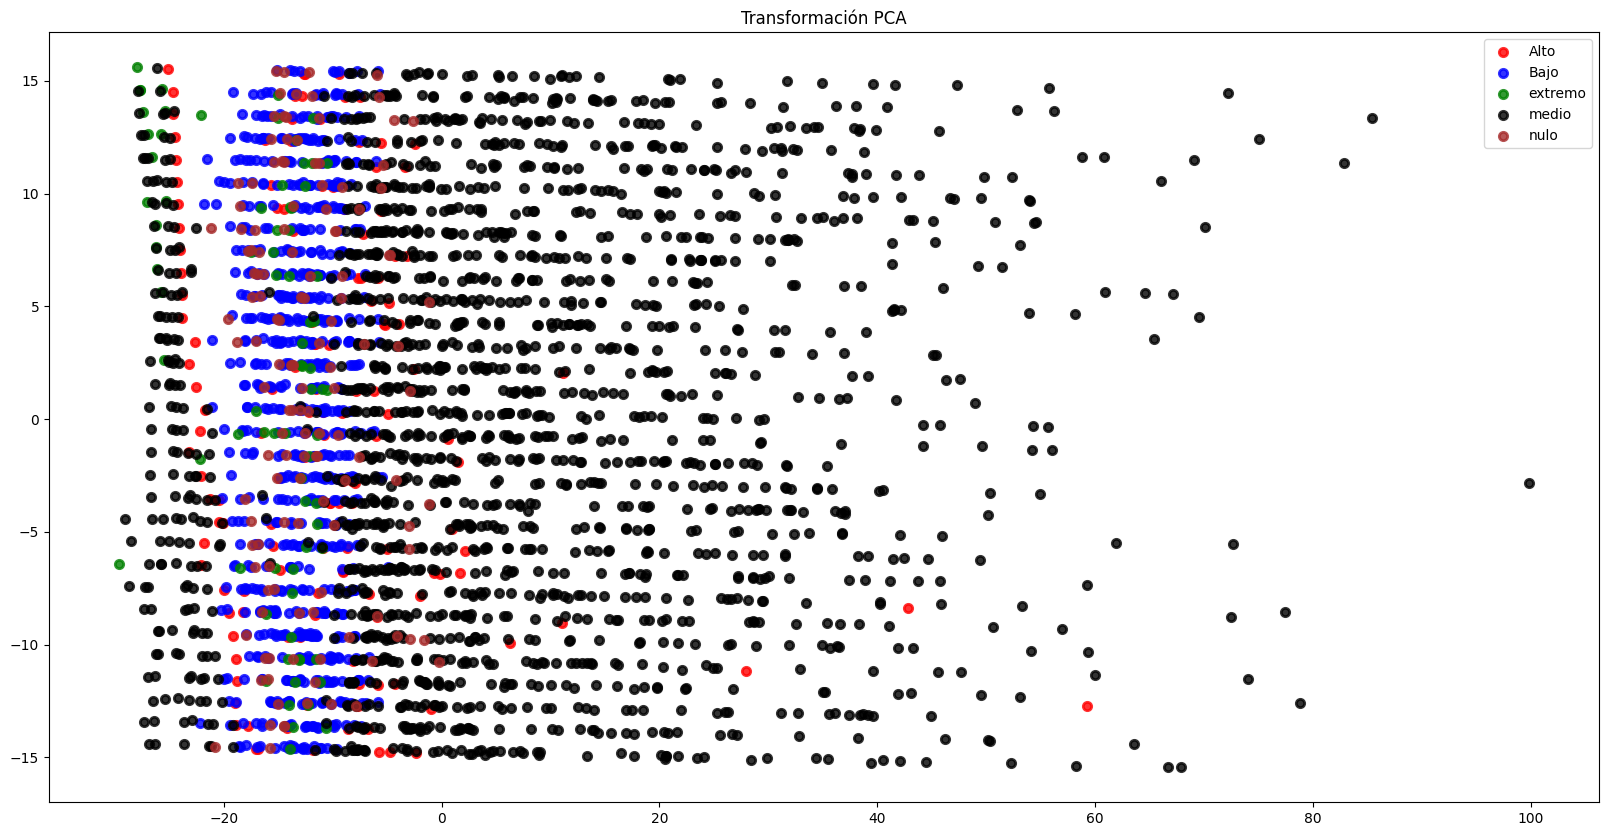

In [130]:
plt.figure(figsize=(20,10))
for color, i, target_name in zip(colores, [0, 1, 2, 3, 4], valores_Environmental_risk):
    plt.scatter(X_PCA[df_copy['Environmental_risk'] == i, 0], X_PCA[df_copy['Environmental_risk'] == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.title("Transformación PCA")

plt.legend(loc="best", shadow=False, scatterpoints=1);

#### Análisis con TSNE

In [131]:
X_TSNE = TSNE(n_components=2).fit_transform(df_copy[caracteristicas])

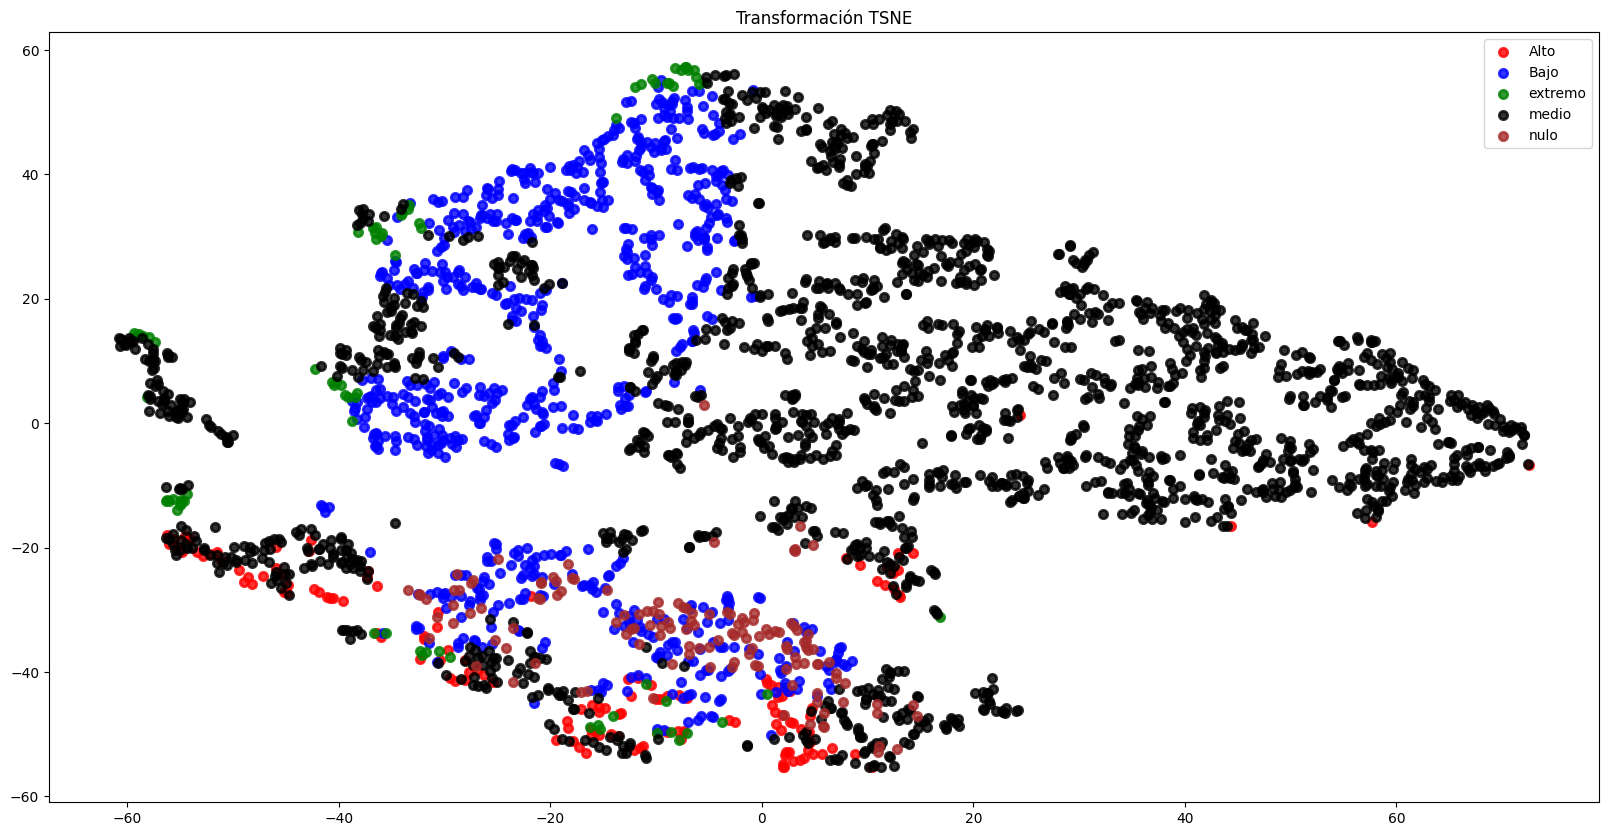

In [132]:
plt.figure(figsize=(20,10))
for color, i, target_name in zip(colores, [0, 1, 2, 3, 4], valores_Environmental_risk):
    plt.scatter(X_TSNE[df_copy['Environmental_risk'] == i, 0], X_TSNE[df_copy['Environmental_risk'] == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.title("Transformación TSNE")

plt.legend(loc="best", shadow=False, scatterpoints=1);

### Clustering 

#### Analizando con reducción de datos PCA

In [133]:
from sklearn.cluster import KMeans
cluster_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_PCA)
    cluster_var.append(kmeans.inertia_)

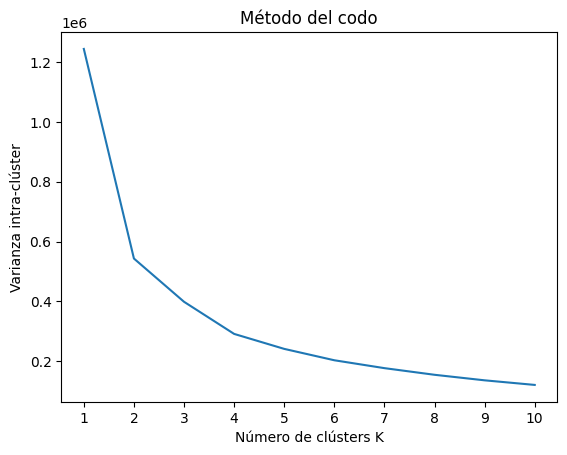

In [134]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
plt.plot(range(1, 11), cluster_var)
plt.title('Método del codo')
plt.xlabel('Número de clústers K')
plt.ylabel('Varianza intra-clúster')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [135]:
kmeans = KMeans(n_clusters=4)

kmeans_labels = kmeans.fit_predict(X_PCA)

df_X_PCA = pd.DataFrame(X_PCA, columns=['Componente 1', 'Componente 2'])

df_X_PCA['Environmental_risk'] = df_copy['Environmental_risk']

df_X_PCA['Cluster'] = kmeans_labels

centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Clustering con KMeans')

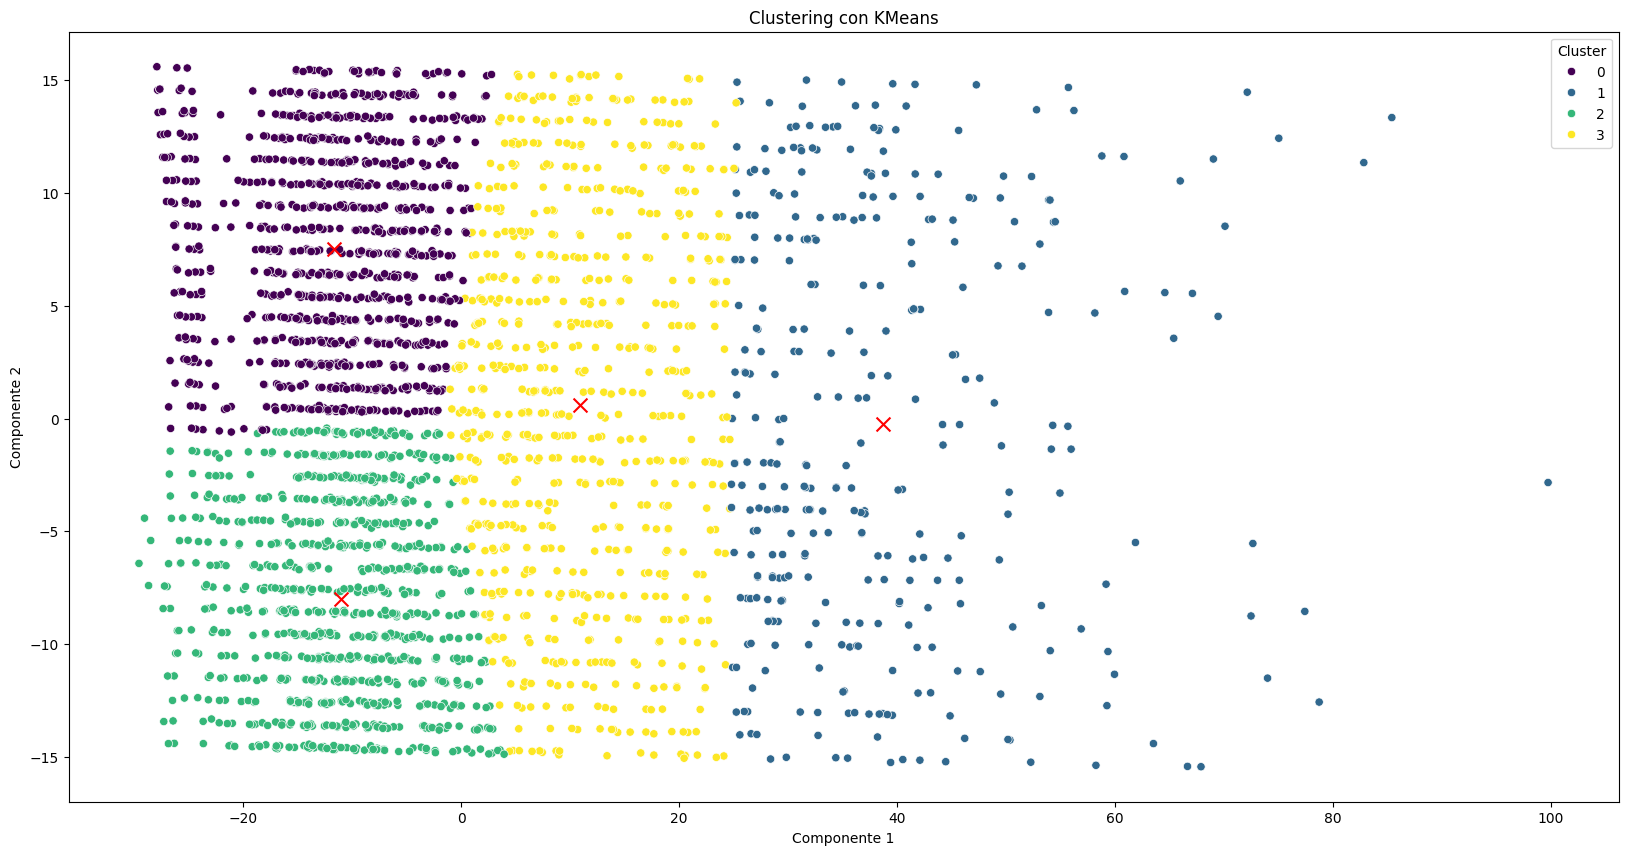

In [136]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_X_PCA, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.title('Clustering con KMeans')

In [137]:
print(list(zip([0, 1, 2, 3, 4], valores_Environmental_risk)))

[(0, 'Alto'), (1, 'Bajo'), (2, 'extremo'), (3, 'medio'), (4, 'nulo')]


In [138]:
cluster_stats = df_X_PCA.groupby('Cluster')['Environmental_risk'].value_counts(normalize=True)

print(cluster_stats)

Cluster  Environmental_risk
0        3.0                   0.458647
         1.0                   0.342642
         0.0                   0.091300
         4.0                   0.059076
         2.0                   0.048335
1        3.0                   0.952663
         1.0                   0.044379
         4.0                   0.002959
2        3.0                   0.497797
         1.0                   0.339207
         4.0                   0.072687
         0.0                   0.053965
         2.0                   0.036344
3        3.0                   0.863574
         1.0                   0.120055
         4.0                   0.009550
         0.0                   0.006821
Name: proportion, dtype: float64


#### Analizando con reducción TSNE

In [139]:
cluster_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_TSNE)
    cluster_var.append(kmeans.inertia_)

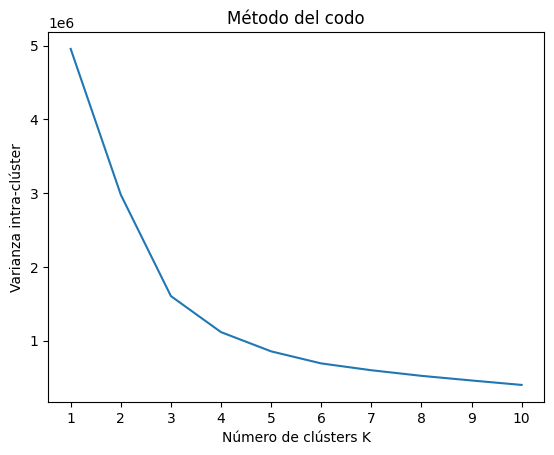

In [140]:
ax = plt.figure().gca()
plt.plot(range(1, 11), cluster_var)
plt.title('Método del codo')
plt.xlabel('Número de clústers K')
plt.ylabel('Varianza intra-clúster')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [141]:
kmeans = KMeans(n_clusters=5)

kmeans_labels = kmeans.fit_predict(X_TSNE)

df_X_TSNE = pd.DataFrame(X_TSNE, columns=['Componente 1', 'Componente 2'])

df_X_TSNE['Environmental_risk'] = df_copy['Environmental_risk']

df_X_TSNE['Cluster'] = kmeans_labels

centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Clustering con KMeans')

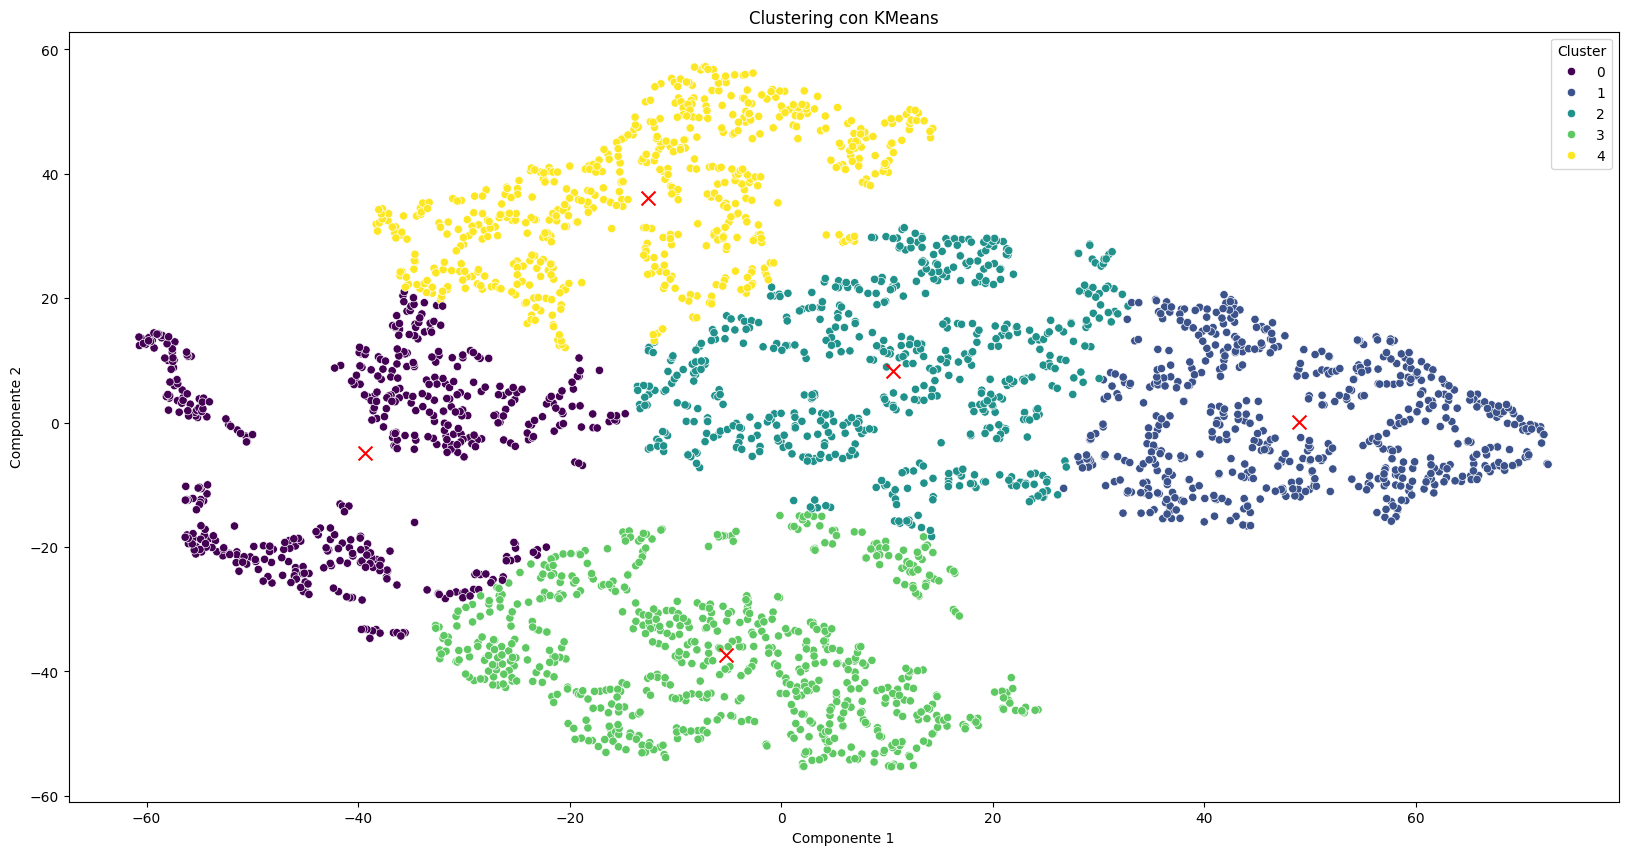

In [142]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_X_TSNE, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.title('Clustering con KMeans')

In [143]:
print(list(zip([0, 1, 2, 3, 4], valores_Environmental_risk)))

[(0, 'Alto'), (1, 'Bajo'), (2, 'extremo'), (3, 'medio'), (4, 'nulo')]


In [144]:
cluster_stats = df_X_TSNE.groupby('Cluster')['Environmental_risk'].value_counts(normalize=True)

print(cluster_stats)

Cluster  Environmental_risk
0        3.0                   0.539554
         1.0                   0.326572
         0.0                   0.068966
         2.0                   0.046653
         4.0                   0.018256
1        3.0                   0.952548
         1.0                   0.043937
         0.0                   0.001757
         4.0                   0.001757
2        3.0                   0.852101
         1.0                   0.139496
         4.0                   0.005042
         0.0                   0.001681
         2.0                   0.001681
3        3.0                   0.329412
         1.0                   0.308824
         4.0                   0.170588
         0.0                   0.151471
         2.0                   0.039706
4        3.0                   0.514834
         1.0                   0.438045
         2.0                   0.047120
Name: proportion, dtype: float64
